<a href="https://colab.research.google.com/github/EstherAregbe/SQL-Queries-Project/blob/main/Esther_Aregbe%2CPython_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Insights in Film Industry: Budget, Votes, and Revenue Relationships

Import the neccesay libraries needed

In [37]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.impute import SimpleImputer
import re

import seaborn as sns


In [38]:
df = pd.read_csv('sample_data/movies.csv')

Preview the Data

In [39]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


##**Data Cleaning**

check for missing data

In [40]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#replace missing values for numeric columns with the median
replace missing vlaues for non - numeric with most frequent
#Create imputers for numeric and non-numeric data
Impute the missing values in numeric columns
#Impute the missing values in non-numeric columns
Verify if there are still any missing values

In [41]:
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])

print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


#check the  data types

In [42]:
df.dtypes

name         object
rating       object
genre        object
year        float64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#change data types of columns needed for the correlation

In [43]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


# Exract the year and country in the release column and replace the year column
- some of the years in the year column does not match the year in the released column  
- some of the country in the release dont match as well

In [45]:
# Extract year
df['yearcorrect'] = df['released'].apply(lambda x: re.search(r'\b\d{4}\b', x).group())

# Extract country
df['countrycorrect'] = df['released'].apply(lambda x: re.search(r'\(([^)]+)\)', x).group(1))


Order the dataset by revenue

In [46]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
5445,Avatar,PG-13,Action,2009.0,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019.0,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
3045,Titanic,PG-13,Drama,1997.0,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018.0,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000.0,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001,United States
7625,The Untold Story,R,Comedy,2019.0,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019,United States
7580,Run with the Hunted,Not Rated,Crime,2019.0,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020,United States
2417,Madadayo,R,Drama,1993.0,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993,Japan


#check if there are duplicates and drop them

In [47]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [48]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States


### checking the correlations column

use scaterplot to check budget and revenue

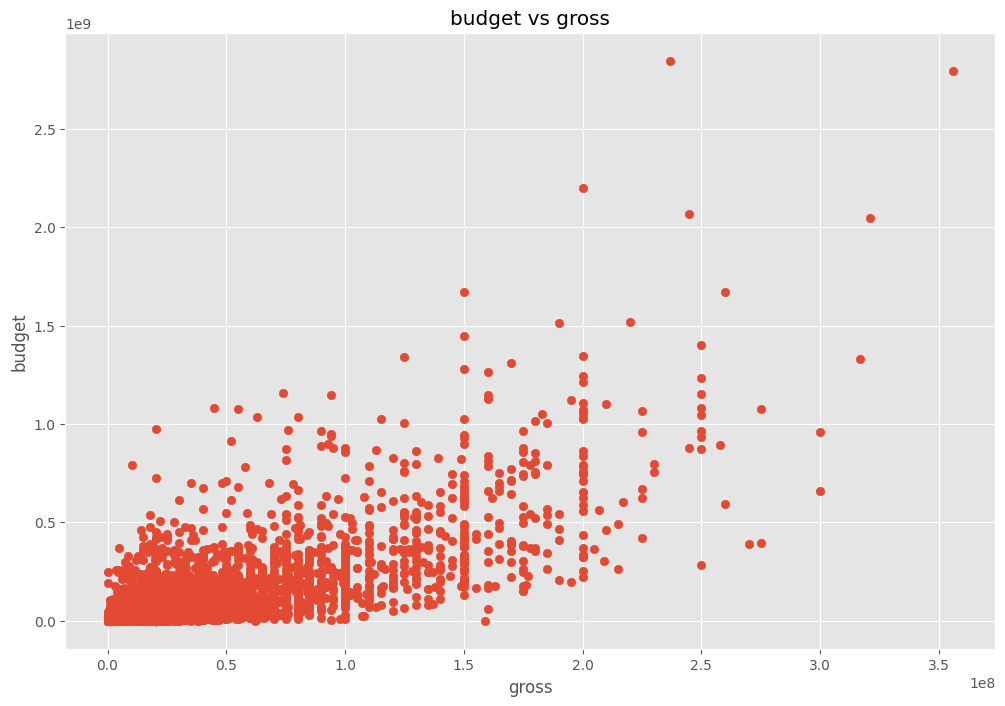

In [49]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs gross')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show()

plot the budget vs gross using seaborn

<Axes: xlabel='budget', ylabel='gross'>

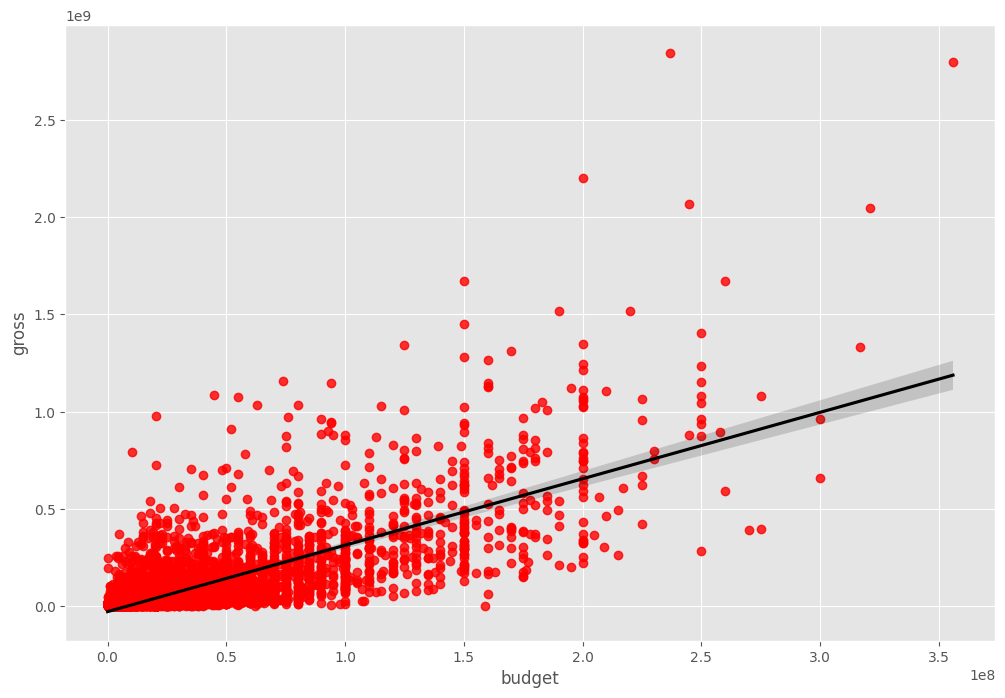

In [51]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})

#see correlation

In [52]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.098013  0.222573  0.291690  0.259504  0.120662
score    0.098013  1.000000  0.409157  0.061931  0.185563  0.399407
votes    0.222573  0.409157  1.000000  0.460968  0.632120  0.309151
budget   0.291690  0.061931  0.460968  1.000000  0.745881  0.273371
gross    0.259504  0.185563  0.632120  0.745881  1.000000  0.244380
runtime  0.120662  0.399407  0.309151  0.273371  0.244380  1.000000


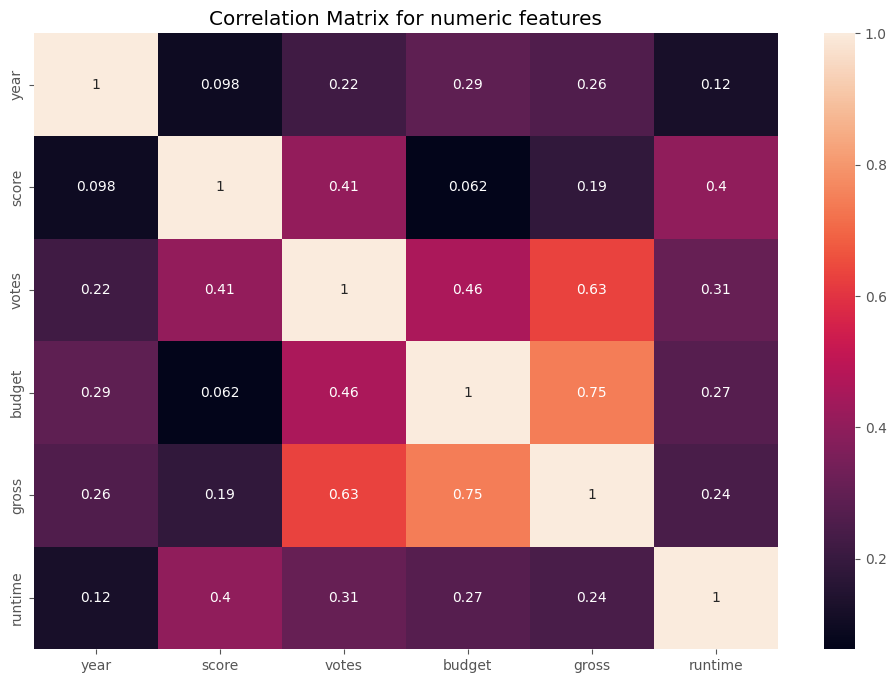

In [54]:
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.show()

looking at non numerica colums



In [55]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
0,6587,6,6,1980.0,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0,56
1,5573,6,1,1980.0,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0,56
2,5142,4,0,1980.0,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0,56
3,286,4,4,1980.0,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0,56
4,1027,6,4,1980.0,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020.0,2964,3.1,18.0,1500,2289,2421,55,7000,20205757,2281,90.0,40,56
7664,1678,6,4,2020.0,1107,4.7,36.0,774,2614,1886,55,20500000,20205757,539,90.0,40,56
7665,4717,6,6,2020.0,193,5.7,29.0,2061,2683,2040,55,58750,20205757,941,104.0,40,8
7666,2843,6,6,2020.0,2817,6.5,33000.0,1184,1824,450,55,15000,20205757,2281,120.0,40,56


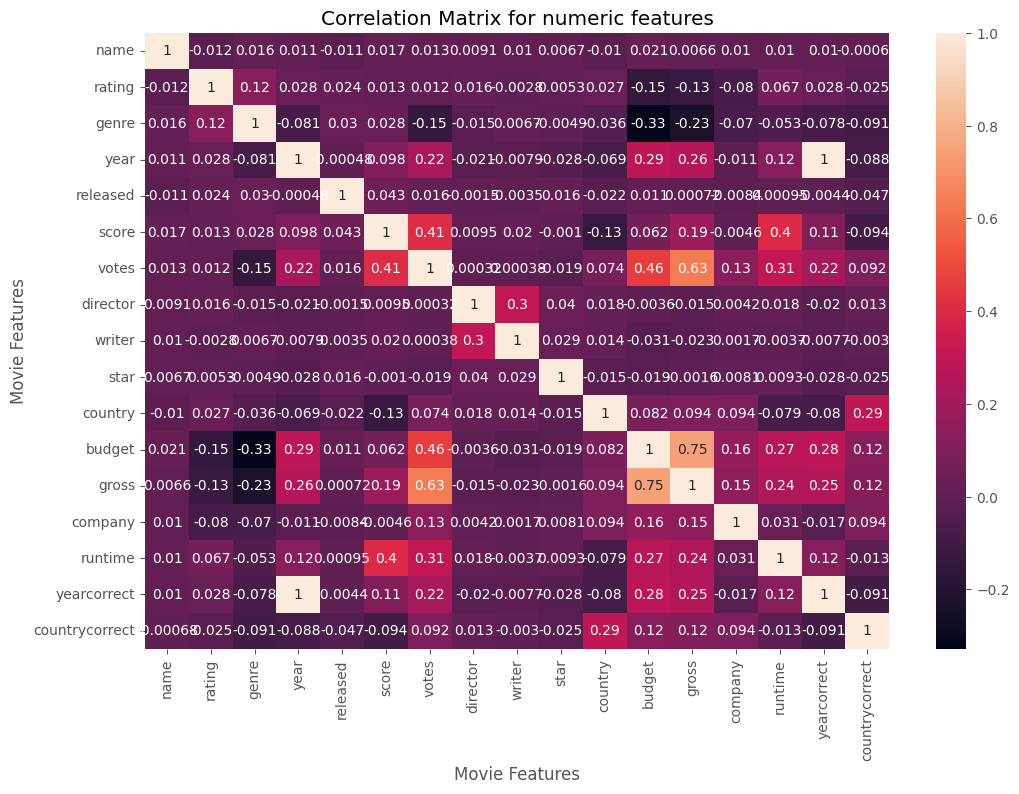

In [56]:
 correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [57]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017105,0.013056,0.009079,0.010018,0.006749,-0.010425,0.020921,0.006601,0.010369,0.010335,0.010379,-0.000682
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013276,0.012286,0.016255,-0.002795,0.005314,0.026930,-0.148543,-0.130478,-0.079626,0.066597,0.028017,-0.025296
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027965,-0.145291,-0.015258,0.006746,-0.004856,-0.035896,-0.328484,-0.233385,-0.070013,-0.052719,-0.078120,-0.090932
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.098013,0.222573,-0.020795,-0.007901,-0.027745,-0.069423,0.291690,0.259504,-0.011438,0.120662,0.996802,-0.088384
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042662,0.015980,-0.001492,-0.003461,0.015550,-0.022042,0.011049,0.000721,-0.008443,0.000947,-0.004379,-0.046574
score,0.017105,0.013276,0.027965,0.098013,0.042662,1.000000,0.409157,0.009540,0.019745,-0.001006,-0.134557,0.061931,0.185563,-0.004570,0.399407,0.106221,-0.094051
votes,0.013056,0.012286,-0.145291,0.222573,0.015980,0.409157,1.000000,0.000316,0.000379,-0.019371,0.073522,0.460968,0.632120,0.130562,0.309151,0.217995,0.092366
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009540,0.000316,1.000000,0.299512,0.039715,0.017926,-0.003584,-0.014758,0.004250,0.017611,-0.020399,0.013301
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019745,0.000379,0.299512,1.000000,0.028745,0.014409,-0.031050,-0.023028,0.001665,-0.003715,-0.007694,-0.002998
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.001006,-0.019371,0.039715,0.028745,1.000000,-0.014749,-0.018814,-0.001640,0.008072,0.009253,-0.028117,-0.024893


check the ones with high correlation


In [58]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget          genre            -0.328484
genre           budget           -0.328484
gross           genre            -0.233385
genre           gross            -0.233385
budget          rating           -0.148543
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
yearcorrect     yearcorrect       1.000000
countrycorrect  countrycorrect    1.000000
Length: 289, dtype: float64

In [59]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           gross             0.632120
gross           votes             0.632120
budget          gross             0.745881
gross           budget            0.745881
year            yearcorrect       0.996802
yearcorrect     year              0.996802
name            name              1.000000
writer          writer            1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
yearcorrect     yearcorrect       1.000000
countrycorrect  countrycorrect    1.000000
dtype: floa

##Moderate to Strong Positive Correlation:

Votes and Gross Revenue (0.63): Movies with more votes tend to generate higher gross revenues.

##Strong Positive Correlation:

Budget and Gross Revenue (0.75): Higher budget movies tend to earn more in gross revenue.